<a href="https://colab.research.google.com/github/elaitenstile/MDKAJ_ENA_Term_Paper/blob/main/HS3100_ENA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

# Building basic graph using NX

In [ ]:
n_nodes = 20
min_frac_employed = 0.1
max_frac_employed = 0.4
min_emp_ties = 0
max_emp_ties = int(0.1*n_nodes)
min_unemp_ties = 1
max_unemp_ties = int(0.4*n_nodes)
prob_strong_tie = 0.3

min_n_emp = int(min_frac_employed*n_nodes)
max_n_emp = int(max_frac_employed*n_nodes)

all_nodes = range(1,n_nodes+1)
n_emp = np.random.choice(range(min_n_emp,max_n_emp))
emp_nodes_list = np.random.choice(all_nodes,size=n_emp)

unemp_nodes_list = [x for x in all_nodes if x not in emp_nodes_list]
G1 = nx.Graph()
G1.add_nodes_from(emp_nodes_list)
G1.add_nodes_from(unemp_nodes_list)


edges_list = []
node_tie_dict = {k:0 for k in all_nodes}
max_empnode_info = {k:max_emp_ties for k in emp_nodes_list}
max_unempnode_info = {k:max_unemp_ties for k in unemp_nodes_list}
edge_strong = []
edge_weak = []
for node in emp_nodes_list:
  num_ties = np.random.choice(range(min_emp_ties,max_emp_ties+min_emp_ties))
  connects = np.random.choice(all_nodes,size=num_ties)
  for connect in connects:
    try:
      if node_tie_dict[connect] < max_empnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))
    except:
      if node_tie_dict[connect] < max_unempnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))

for node in unemp_nodes_list:
  num_ties = np.random.choice(range(min_unemp_ties,max_unemp_ties+min_unemp_ties))
  connects = np.random.choice(all_nodes,size=num_ties)
  for connect in connects:
    try:
      if node_tie_dict[connect] < max_empnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))
    except:
      if node_tie_dict[connect] < max_unempnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))

edges_list = list(set(edges_list))
G1.add_edges_from(edges_list)

strong_ties = []
weak_ties = []

for edge in edges_list:
  if np.random.random() < prob_strong_tie:
    strong_ties.append(edge)
  else:
    weak_ties.append(edge)

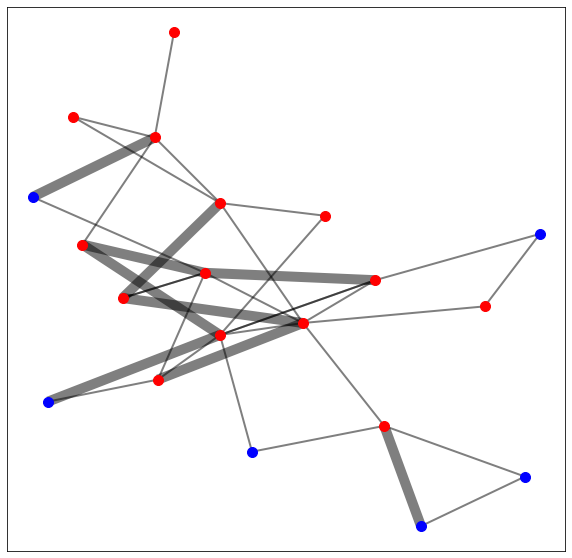

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout

plt.figure(figsize=(10,10))
pos =  nx.nx_pydot.graphviz_layout(G1)
nx.draw_networkx_nodes(G1, pos, node_size=100, nodelist=unemp_nodes_list, node_color="r")
nx.draw_networkx_nodes(G1, pos, node_size=100, nodelist=emp_nodes_list, node_color="b")
nx.draw_networkx_edges(G1, pos, edgelist=strong_ties, alpha=0.5, width=10)
nx.draw_networkx_edges(G1, pos, edgelist=weak_ties, alpha=0.5, width=2)
plt.show()

# Basic simulation of graph for few timesteps (without employee recommendation)

In [ ]:
# First timestep. 

n_nodes = 20
min_frac_employed = 0.1
max_frac_employed = 0.4
min_n_emp = int(min_frac_employed*n_nodes)
max_n_emp = int(max_frac_employed*n_nodes)

min_emp_ties = 0
max_emp_ties = int(0.1*n_nodes)
min_unemp_ties = 1
max_unemp_ties = int(0.4*n_nodes)
prob_strong_tie = 0.3

all_nodes = range(1,n_nodes+1)
n_emp = np.random.choice(range(min_n_emp,max_n_emp))
# emp_nodes_list = np.random.choice(all_nodes,size=n_emp)
emp_nodes_list = []
unemp_nodes_list = [x for x in all_nodes if x not in emp_nodes_list]
G1 = nx.Graph()
G1.add_nodes_from(emp_nodes_list)
G1.add_nodes_from(unemp_nodes_list)


edges_list = []
node_tie_dict = {k:0 for k in all_nodes}
max_empnode_info = {k:max_emp_ties for k in emp_nodes_list}
max_unempnode_info = {k:max_unemp_ties for k in unemp_nodes_list}
edge_strong = []
edge_weak = []
for node in emp_nodes_list:
  num_ties = np.random.choice(range(min_emp_ties,max_emp_ties+min_emp_ties))
  connects = np.random.choice(all_nodes,size=num_ties)
  for connect in connects:
    try:
      if node_tie_dict[connect] < max_empnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))
    except:
      if node_tie_dict[connect] < max_unempnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))

for node in unemp_nodes_list:
  num_ties = np.random.choice(range(min_unemp_ties,max_unemp_ties+min_unemp_ties))
  connects = np.random.choice(all_nodes,size=num_ties)
  for connect in connects:
    try:
      if node_tie_dict[connect] < max_empnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))
    except:
      if node_tie_dict[connect] < max_unempnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))

edges_list = list(set(edges_list))
G1.add_edges_from(edges_list)

strong_ties = []
weak_ties = []

for edge in edges_list:
  if np.random.random() < prob_strong_tie:
    strong_ties.append(edge)
  else:
    weak_ties.append(edge)

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout

def plot_graph(G1, emp_nodes_list, unemp_nodes_list, timestep):
  plt.figure(figsize=(5,5))
  pos =  nx.nx_pydot.graphviz_layout(G1)
  nx.draw_networkx_nodes(G1, pos, node_size=100, nodelist=unemp_nodes_list, node_color="r")
  nx.draw_networkx_nodes(G1, pos, node_size=100, nodelist=emp_nodes_list, node_color="b")
  nx.draw_networkx_edges(G1, pos, edgelist=strong_ties, alpha=0.5, width=10)
  nx.draw_networkx_edges(G1, pos, edgelist=weak_ties, alpha=0.5, width=2)
  plt.title('Network at timestep: '+str(timestep))
  plt.show()

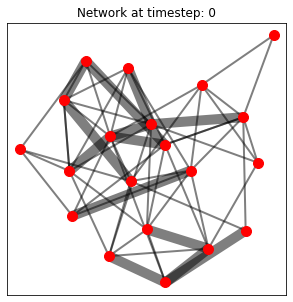

In [ ]:
plot_graph(G1, emp_nodes_list, unemp_nodes_list, 0)

In [ ]:
def sim_one_timestep(G, emp_nodes_list, unemp_nodes_list, hire_prob=0.4, fire_prob=0.4):
  ## fire
  tmp_emp = []
  for emp_node in emp_nodes_list:
    if np.random.random() < fire_prob:
      unemp_nodes_list.append(emp_node)
    else:
      tmp_emp.append(emp_node)
  emp_nodes_list = tmp_emp.copy()
  del tmp_emp

  ## hire
  tmp_unemp = []
  for unemp_node in unemp_nodes_list:
    if np.random.random() < hire_prob:
      emp_nodes_list.append(unemp_node)
    else:
      tmp_unemp.append(unemp_node)
  unemp_nodes_list = tmp_unemp.copy()
  del tmp_unemp

  return emp_nodes_list, unemp_nodes_list

In [ ]:
hire_prob = 0.4
fire_prob = 0.4
num_timesteps = 500
emp_percentage = []
for timestep in range(1,1+num_timesteps):
  emp_nodes_list, unemp_nodes_list = sim_one_timestep(G1, emp_nodes_list, unemp_nodes_list, hire_prob, fire_prob)
  # plot_graph(G1, emp_nodes_list, unemp_nodes_list, timestep)
  emp_percentage.append(len(emp_nodes_list)*100/n_nodes)
# for i,e in enumerate(emp_percentage):
#   print(f"Employement % at timestep {i+1}: {e}")

# Basic simulation of graph for few timesteps (with employee recommendation)

In [ ]:
# First timestep. 

n_nodes = 20
min_frac_employed = 0.1
max_frac_employed = 0.4
min_n_emp = int(min_frac_employed*n_nodes)
max_n_emp = int(max_frac_employed*n_nodes)

min_emp_ties = 1
max_emp_ties = int(0.1*n_nodes)
min_unemp_ties = 1
max_unemp_ties = int(0.4*n_nodes)
prob_strong_tie = 0.3

all_nodes = range(1,n_nodes+1)
n_emp = np.random.choice(range(min_n_emp,max_n_emp))
emp_nodes_list = np.random.choice(all_nodes,size=n_emp,replace=False)
unemp_nodes_list = [x for x in all_nodes if x not in emp_nodes_list]
G1 = nx.Graph()
G1.add_nodes_from(emp_nodes_list)
G1.add_nodes_from(unemp_nodes_list)

edges_list = []
node_tie_dict = {k:0 for k in all_nodes}
max_empnode_info = {k:max_emp_ties for k in emp_nodes_list}
max_unempnode_info = {k:max_unemp_ties for k in unemp_nodes_list}
edge_strong = []
edge_weak = []
for node in emp_nodes_list:
  num_ties = np.random.choice(range(min_emp_ties,max_emp_ties+min_emp_ties))
  connects = np.random.choice(all_nodes,size=num_ties,replace=False)
  for connect in connects:
    try:
      if node_tie_dict[connect] < max_empnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))
    except:
      if node_tie_dict[connect] < max_unempnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))

for node in unemp_nodes_list:
  num_ties = np.random.choice(range(min_unemp_ties,max_unemp_ties+min_unemp_ties))
  connects = np.random.choice(all_nodes,size=num_ties,replace=False)
  for connect in connects:
    try:
      if node_tie_dict[connect] < max_empnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))
    except:
      if node_tie_dict[connect] < max_unempnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        edges_list.append((node,connect))

edges_list = list(set(edges_list))

G1.add_edges_from(edges_list)

strong_ties = []
weak_ties = []

for edge in edges_list:
  if np.random.random() < prob_strong_tie:
    strong_ties.append(edge)
  else:
    weak_ties.append(edge)

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout

def plot_graph(G1, emp_nodes_list, unemp_nodes_list, timestep):
  plt.figure(figsize=(5,5))
  pos =  nx.nx_pydot.graphviz_layout(G1)
  nx.draw_networkx_nodes(G1, pos, node_size=100, nodelist=unemp_nodes_list, node_color="r")
  nx.draw_networkx_nodes(G1, pos, node_size=100, nodelist=emp_nodes_list, node_color="b")
  nx.draw_networkx_edges(G1, pos, edgelist=strong_ties, alpha=0.5, width=10)
  nx.draw_networkx_edges(G1, pos, edgelist=weak_ties, alpha=0.5, width=2)
  plt.title('Network at timestep: '+str(timestep))
  plt.show()

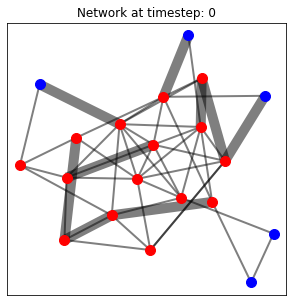

In [ ]:
plot_graph(G1, emp_nodes_list, unemp_nodes_list, 0)

In [ ]:
def sim_one_timestep(G, emp_nodes_list, unemp_nodes_list, hire_prob=0.4, fire_prob=0.4):
  ## fire
  tmp_emp = []
  for emp_node in emp_nodes_list:
    if np.random.random() < fire_prob:
      unemp_nodes_list.append(emp_node)
    else:
      tmp_emp.append(emp_node)
  emp_nodes_list = tmp_emp.copy()
  del tmp_emp

  ## hire via recommendation
  new_emp = []
  for emp_node in emp_nodes_list:
    if np.random.random() < hire_prob:
      unemp_connections = [x for x in list(G.adj[emp_node]) if x in unemp_nodes_list]
      if len(unemp_connections):
        recommended_node = np.random.choice(unemp_connections)
        new_emp.append(recommended_node)
        ### Remove recommended_node from unemp_nodes_list
        unemp_nodes_list.remove(recommended_node)
  emp_nodes_list.extend(list(set(new_emp)))

  ## hire without recommendation
  tmp_unemp = []
  for unemp_node in unemp_nodes_list:
    if np.random.random() < hire_prob:
      emp_nodes_list.append(unemp_node)
    else:
      tmp_unemp.append(unemp_node)
  unemp_nodes_list = tmp_unemp.copy()
  del tmp_unemp

  return emp_nodes_list, unemp_nodes_list

Hire Probability: 0.4 | Fire probability: 0.2 | Mean Employement% of Last 100 timesteps (out of 1000 timesteps) : 91.919%


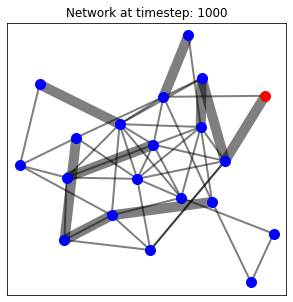

Hire Probability: 0.4 | Fire probability: 0.4 | Mean Employement% of Last 100 timesteps (out of 1000 timesteps) : 74.848%


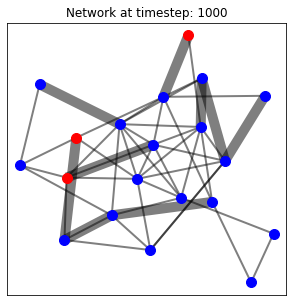

Hire Probability: 0.4 | Fire probability: 0.8 | Mean Employement% of Last 100 timesteps (out of 1000 timesteps) : 49.293%


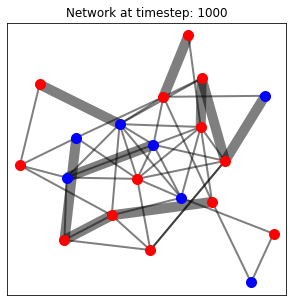

In [ ]:
hire_prob = 0.4
fire_prob_list = [0.2,0.4,0.8]
num_timesteps = 1000
for fire_prob in fire_prob_list:
  emp_percentage = []
  unemp_percentage = []
  for timestep in range(1,1+num_timesteps):
    emp_nodes_list, unemp_nodes_list = sim_one_timestep(G1, emp_nodes_list, unemp_nodes_list, hire_prob, fire_prob)
    # plot_graph(G1, emp_nodes_list, unemp_nodes_list, timestep)
    emp_percentage.append(len(emp_nodes_list)*100/n_nodes)
    unemp_percentage.append(len(unemp_nodes_list)*100/n_nodes)
  print(f"Hire Probability: {hire_prob} | Fire probability: {fire_prob} | Mean Employement% of Last 100 timesteps (out of {num_timesteps} timesteps) : {np.around(np.mean(emp_percentage[-100:-1]),3)}%")
  plot_graph(G1, emp_nodes_list, unemp_nodes_list, num_timesteps)
# for i,e in enumerate(emp_percentage):
#   print(f"Employement % at timestep {i+1}: {e}")

# Influence of ties

In [ ]:
# First timestep. 

n_nodes = 50
min_frac_employed = 0.1
max_frac_employed = 0.4
min_n_emp = int(min_frac_employed*n_nodes)
max_n_emp = int(max_frac_employed*n_nodes)

min_emp_ties = 1
max_emp_ties = int(0.2*n_nodes)
min_unemp_ties = 1
max_unemp_ties = int(0.4*n_nodes)
prob_strong_tie = 0.3

all_nodes = range(1,n_nodes+1)
n_emp = np.random.choice(range(min_n_emp,max_n_emp))
emp_nodes_list = np.random.choice(all_nodes,size=n_emp,replace=False)
unemp_nodes_list = [x for x in all_nodes if x not in emp_nodes_list]
G1 = nx.Graph()
G1.add_nodes_from(emp_nodes_list)
G1.add_nodes_from(unemp_nodes_list)

edges_list = []
node_tie_dict = {k:0 for k in all_nodes}
max_empnode_info = {k:max_emp_ties for k in emp_nodes_list}
max_unempnode_info = {k:max_unemp_ties for k in unemp_nodes_list}
edge_strong = []
edge_weak = []
for node in emp_nodes_list:
  num_ties = np.random.choice(range(min_emp_ties,max_emp_ties+min_emp_ties))
  connects = np.random.choice(all_nodes,size=num_ties,replace=False)
  for connect in connects:
    try:
      if node_tie_dict[connect] < max_empnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        if np.random.random() < prob_strong_tie:
          edges_list.append((node,connect,{'weight': 10}))
        else:
          edges_list.append((node,connect,{'weight': 1}))
    except:
      if node_tie_dict[connect] < max_unempnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        if np.random.random() < prob_strong_tie:
          edges_list.append((node,connect,{'weight': 10}))
        else:
          edges_list.append((node,connect,{'weight': 1}))

for node in unemp_nodes_list:
  num_ties = np.random.choice(range(min_unemp_ties,max_unemp_ties+min_unemp_ties))
  connects = np.random.choice(all_nodes,size=num_ties,replace=False)
  for connect in connects:
    try:
      if node_tie_dict[connect] < max_empnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        if np.random.random() < prob_strong_tie:
          edges_list.append((node,connect,{'weight': 10}))
        else:
          edges_list.append((node,connect,{'weight': 1}))
    except:
      if node_tie_dict[connect] < max_unempnode_info[connect]:
        node_tie_dict[node] += 1
        node_tie_dict[connect] += 1
        if np.random.random() < prob_strong_tie:
          edges_list.append((node,connect,{'weight': 10}))
        else:
          edges_list.append((node,connect,{'weight': 1}))

# edges_list = list(set(edges_list))

G1.add_edges_from(edges_list)

strong_ties = []
weak_ties = []

for edge in edges_list:
  if np.random.random() < prob_strong_tie:
    strong_ties.append(edge)
  else:
    weak_ties.append(edge)

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout

def plot_graph(G1, emp_nodes_list, unemp_nodes_list, timestep):
  plt.figure(figsize=(5,5))
  pos =  nx.nx_pydot.graphviz_layout(G1)
  nx.draw_networkx_nodes(G1, pos, node_size=100, nodelist=unemp_nodes_list, node_color="r")
  nx.draw_networkx_nodes(G1, pos, node_size=100, nodelist=emp_nodes_list, node_color="b")
  nx.draw_networkx_edges(G1, pos, edgelist=strong_ties, alpha=0.5, width=10)
  nx.draw_networkx_edges(G1, pos, edgelist=weak_ties, alpha=0.5, width=2)
  plt.title('Network at timestep: '+str(timestep))
  plt.show()

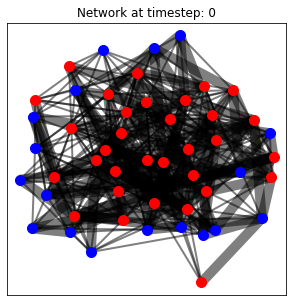

In [ ]:
plot_graph(G1, emp_nodes_list, unemp_nodes_list, 0)

In [ ]:
# Find top 5 nodes with highest number of strong connections.
num_strong_ties = []
for node in all_nodes:
  strong_connections = [v for u,v in G1.edges(node) if (G1.edges[u,v]['weight']==10)]
  num_strong_ties.append(len(strong_connections))
strong_ties_nodes = sorted(range(len(num_strong_ties)), key=lambda k: num_strong_ties[k], reverse=True)
num_strong_ties = sorted(num_strong_ties,reverse=True)
strong_ties_dict = {}
for i,k in enumerate(num_strong_ties):
  strong_ties_dict[k] = strong_ties_nodes[i]
strong_ties_dict

{1: 23, 2: 36, 3: 49, 4: 43, 5: 47, 6: 46, 7: 45, 8: 48, 9: 32, 10: 31}

In [ ]:
def sim_one_timestep(G, emp_nodes_list, unemp_nodes_list, hire_prob=0.4, fire_prob=0.4):
  ## fire
  tmp_emp = []
  for emp_node in emp_nodes_list:
    if np.random.random() < fire_prob:
      unemp_nodes_list.append(emp_node)
    else:
      tmp_emp.append(emp_node)
  emp_nodes_list = tmp_emp.copy()
  del tmp_emp

  ## hire via recommendation
  ## first search for strong ties. then go for weak ties.
  new_emp = []
  for emp_node in emp_nodes_list:
    if np.random.random() < hire_prob:
      unemp_strong_connections = [v for u,v in G.edges(emp_node) if (G.edges[u,v]['weight']==10 and v in unemp_nodes_list)]
      if len(unemp_strong_connections):
        recommended_node = np.random.choice(unemp_strong_connections)
        new_emp.append(recommended_node)
        ### Remove recommended_node from unemp_nodes_list
        unemp_nodes_list.remove(recommended_node)
      else:
        unemp_weak_connections = [v for u,v in G.edges(emp_node) if (G.edges[u,v]['weight']==1 and v in unemp_nodes_list)]
        if len(unemp_weak_connections):
          recommended_node = np.random.choice(unemp_weak_connections)
          new_emp.append(recommended_node)
          ### Remove recommended_node from unemp_nodes_list
          unemp_nodes_list.remove(recommended_node)
  emp_nodes_list.extend(list(set(new_emp)))

  ## hire without recommendation
  tmp_unemp = []
  for unemp_node in unemp_nodes_list:
    if np.random.random() < hire_prob:
      emp_nodes_list.append(unemp_node)
    else:
      tmp_unemp.append(unemp_node)
  unemp_nodes_list = tmp_unemp.copy()
  del tmp_unemp

  return emp_nodes_list, unemp_nodes_list

Hire Probability: 0.4 | Fire probability: 0.2 | Mean Employement% of Last 100 timesteps (out of 1000 timesteps) : 98.303%


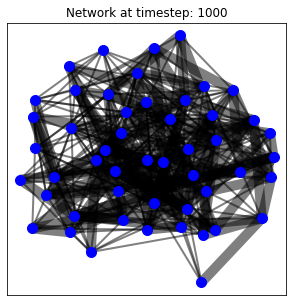

Hire Probability: 0.4 | Fire probability: 0.4 | Mean Employement% of Last 100 timesteps (out of 1000 timesteps) : 78.97%


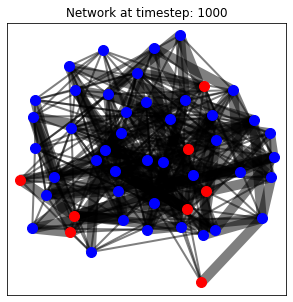

Hire Probability: 0.4 | Fire probability: 0.8 | Mean Employement% of Last 100 timesteps (out of 1000 timesteps) : 49.697%


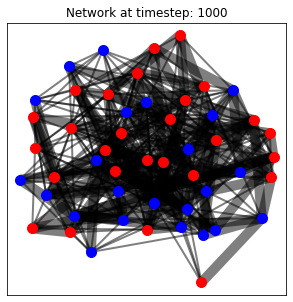

In [ ]:
hire_prob = 0.4
fire_prob_list = [0.2,0.4,0.8]
num_timesteps = 1000
tie_emp_percentage = {k:[] for k in strong_ties_dict}
for fire_prob in fire_prob_list:
  emp_percentage = []
  unemp_percentage = []
  for timestep in range(1,1+num_timesteps):
    emp_nodes_list, unemp_nodes_list = sim_one_timestep(G1, emp_nodes_list, unemp_nodes_list, hire_prob, fire_prob)
    for n_strong_tie in strong_ties_dict:
      isEmp = int(strong_ties_dict[n_strong_tie] in emp_nodes_list)
      tie_emp_percentage[n_strong_tie].append(isEmp)
    emp_percentage.append(len(emp_nodes_list)*100/n_nodes)
    unemp_percentage.append(len(unemp_nodes_list)*100/n_nodes)
  print(f"Hire Probability: {hire_prob} | Fire probability: {fire_prob} | Mean Employement% of Last 100 timesteps (out of {num_timesteps} timesteps) : {np.around(np.mean(emp_percentage[-100:-1]),3)}%")
  plot_graph(G1, emp_nodes_list, unemp_nodes_list, num_timesteps)

In [ ]:
avg_tie_emp_percentage = []
str_n
for n_strong_tie in tie_emp_percentage:


# Ploty example

In [ ]:
G = nx.random_geometric_graph(200, 0.125)

In [ ]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()